In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge

In [2]:
xl = pd.read_excel('ML pro.xlsx')

In [3]:
xl

,Time Stamp,Temperature,Pressure,Flow rate,pH,Concentration,Reactor Size,Catalyst Type,Reaction Time,Yield,Product Quality,Density,Viscosity,Solubility
0,12:00:00 AM,65.48,14.25,6.81,7.58,0.37,20,Type A,17.12,81.2,98.50,0.89,12.50,80.0
1,12:01:00 AM,64.20,13.72,6.22,7.28,0.41,25,Type B,15.57,76.4,98.70,0.86,13.45,85.6
2,12:02:00 AM,63.15,13.11,5.96,7.81,0.38,30,Type C,19.84,84.2,98.10,0.91,11.83,77.4
3,12:03:00 AM,61.72,12.87,5.40,7.13,0.34,35,Type A,20.55,79.6,98.40,0.84,14.07,81.5
4,12:04:00 AM,62.97,13.31,6.43,7.09,0.36,40,Type B,17.76,83.1,97.80,0.87,12.94,79.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,02:41:00 AM,61.65,13.35,6.14,7.55,0.36,35,Type B,18.75,80.9,12.87,81.10,0.88,79.8
146,02:42:00 AM,60.08,13.04,5.90,7.15,0.34,40,Type C,18.49,80.7,12.97,80.60,0.87,80.4
147,02:43:00 AM,62.04,13.57,6.24,7.71,0.38,20,Type A,18.58,81.0,12.90,80.90,0.88,81.0
148,02:44:00 AM,61.40,13.26,6.08,7.43,0.36,25,Type B,18.70,80.8,13.39,81.20,0.87,79.9


In [4]:
xl.to_csv("mlp.csv",index=None,header=True)

In [5]:
df = pd.read_csv('mlp.csv')

In [6]:
df

,Time Stamp,Temperature,Pressure,Flow rate,pH,Concentration,Reactor Size,Catalyst Type,Reaction Time,Yield,Product Quality,Density,Viscosity,Solubility
0,12:00:00 AM,65.48,14.25,6.81,7.58,0.37,20,Type A,17.12,81.2,98.50,0.89,12.50,80.0
1,12:01:00 AM,64.20,13.72,6.22,7.28,0.41,25,Type B,15.57,76.4,98.70,0.86,13.45,85.6
2,12:02:00 AM,63.15,13.11,5.96,7.81,0.38,30,Type C,19.84,84.2,98.10,0.91,11.83,77.4
3,12:03:00 AM,61.72,12.87,5.40,7.13,0.34,35,Type A,20.55,79.6,98.40,0.84,14.07,81.5
4,12:04:00 AM,62.97,13.31,6.43,7.09,0.36,40,Type B,17.76,83.1,97.80,0.87,12.94,79.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,02:41:00 AM,61.65,13.35,6.14,7.55,0.36,35,Type B,18.75,80.9,12.87,81.10,0.88,79.8
146,02:42:00 AM,60.08,13.04,5.90,7.15,0.34,40,Type C,18.49,80.7,12.97,80.60,0.87,80.4
147,02:43:00 AM,62.04,13.57,6.24,7.71,0.38,20,Type A,18.58,81.0,12.90,80.90,0.88,81.0
148,02:44:00 AM,61.40,13.26,6.08,7.43,0.36,25,Type B,18.70,80.8,13.39,81.20,0.87,79.9


In [7]:
df.head()

,Time Stamp,Temperature,Pressure,Flow rate,pH,Concentration,Reactor Size,Catalyst Type,Reaction Time,Yield,Product Quality,Density,Viscosity,Solubility
0,12:00:00 AM,65.48,14.25,6.81,7.58,0.37,20,Type A,17.12,81.2,98.5,0.89,12.50,80.0
1,12:01:00 AM,64.20,13.72,6.22,7.28,0.41,25,Type B,15.57,76.4,98.7,0.86,13.45,85.6
2,12:02:00 AM,63.15,13.11,5.96,7.81,0.38,30,Type C,19.84,84.2,98.1,0.91,11.83,77.4
3,12:03:00 AM,61.72,12.87,5.40,7.13,0.34,35,Type A,20.55,79.6,98.4,0.84,14.07,81.5
4,12:04:00 AM,62.97,13.31,6.43,7.09,0.36,40,Type B,17.76,83.1,97.8,0.87,12.94,79.8


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time Stamp       150 non-null    object 
 1   Temperature      150 non-null    float64
 2   Pressure         150 non-null    float64
 3   Flow rate        150 non-null    float64
 4   pH               150 non-null    float64
 5   Concentration    150 non-null    float64
 6   Reactor Size     150 non-null    int64  
 7   Catalyst Type    150 non-null    object 
 8   Reaction Time    150 non-null    float64
 9   Yield            150 non-null    float64
 10  Product Quality  150 non-null    float64
 11  Density          150 non-null    float64
 12  Viscosity        150 non-null    float64
 13  Solubility       150 non-null    float64
dtypes: float64(11), int64(1), object(2)
memory usage: 16.5+ KB


In [9]:
df.describe()

,Temperature,Pressure,Flow rate,pH,Concentration,Reactor Size,Reaction Time,Yield,Product Quality,Density,Viscosity,Solubility
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,61.512467,13.314733,6.129467,7.498133,0.365533,29.966667,18.472733,81.109333,74.858733,23.283133,9.592733,80.592667
std,1.038548,0.337157,0.272049,0.263142,0.023446,7.011416,0.796684,0.955686,38.062770,36.048055,5.480382,1.088013
min,59.200000,12.540000,5.260000,7.060000,0.310000,20.000000,15.570000,76.400000,12.820000,0.820000,0.870000,77.400000
25%,60.727500,13.020000,5.950000,7.250000,0.342500,25.000000,18.442500,80.700000,13.370000,0.870000,0.880000,79.900000
50%,61.510000,13.300000,6.110000,7.490000,0.360000,30.000000,18.635000,80.900000,98.100000,0.890000,12.835000,80.500000
75%,62.147500,13.527500,6.277500,7.717500,0.380000,35.000000,18.815000,81.300000,98.200000,80.600000,13.277500,81.100000
max,65.480000,14.250000,6.850000,8.010000,0.410000,40.000000,20.550000,84.500000,98.700000,81.300000,14.380000,85.600000


# EDA

<Figure size 1000x800 with 0 Axes>

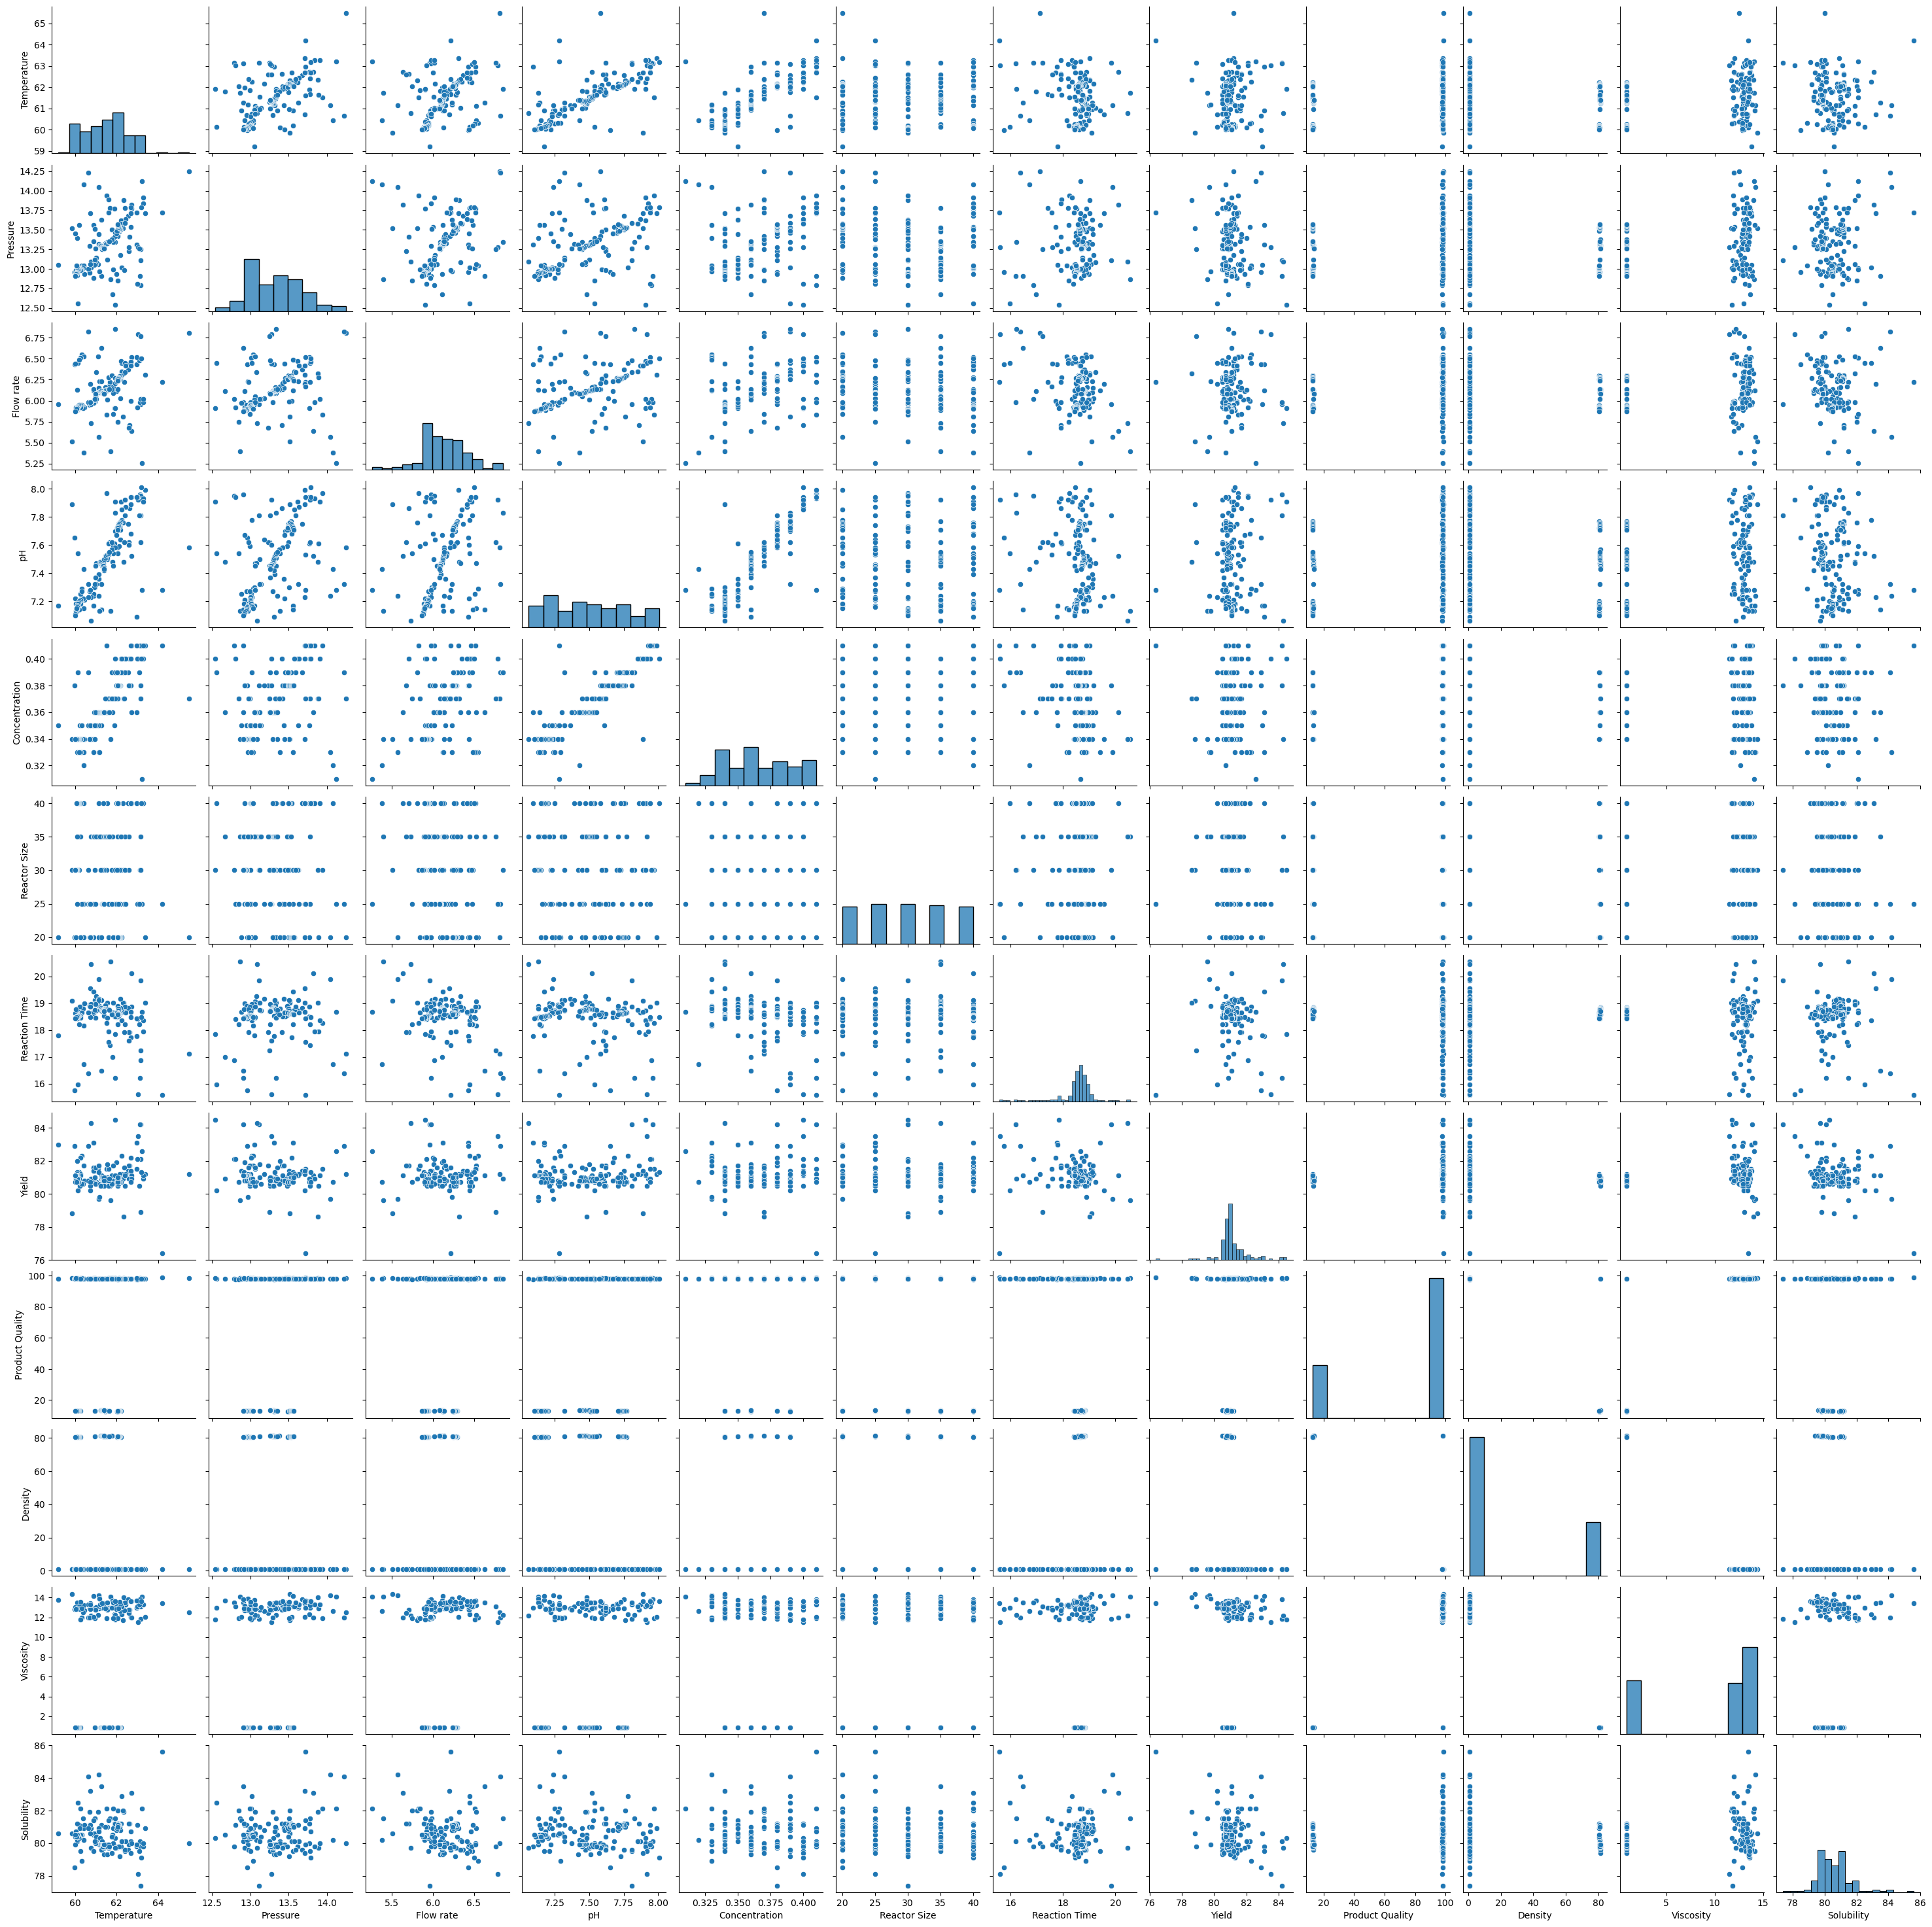

<Figure size 1000x800 with 0 Axes>

In [10]:
sns.pairplot(df)
plt.figure(figsize=(10,8))

In [11]:
ls = df.columns
ls

Index(['Time Stamp', 'Temperature', 'Pressure', 'Flow rate', 'pH',
       'Concentration', 'Reactor Size', 'Catalyst Type', 'Reaction Time',
       'Yield', 'Product Quality', 'Density', 'Viscosity', 'Solubility'],
      dtype='object')

C:\Users\TOUFIK\AppData\Local\Temp\ipykernel_16128\2511902570.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Yield'])


<AxesSubplot:xlabel='Yield', ylabel='Density'>

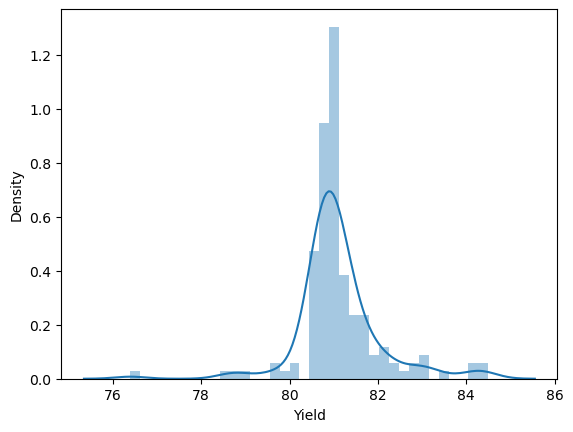

In [12]:
sns.distplot(df['Yield'])


<AxesSubplot:>

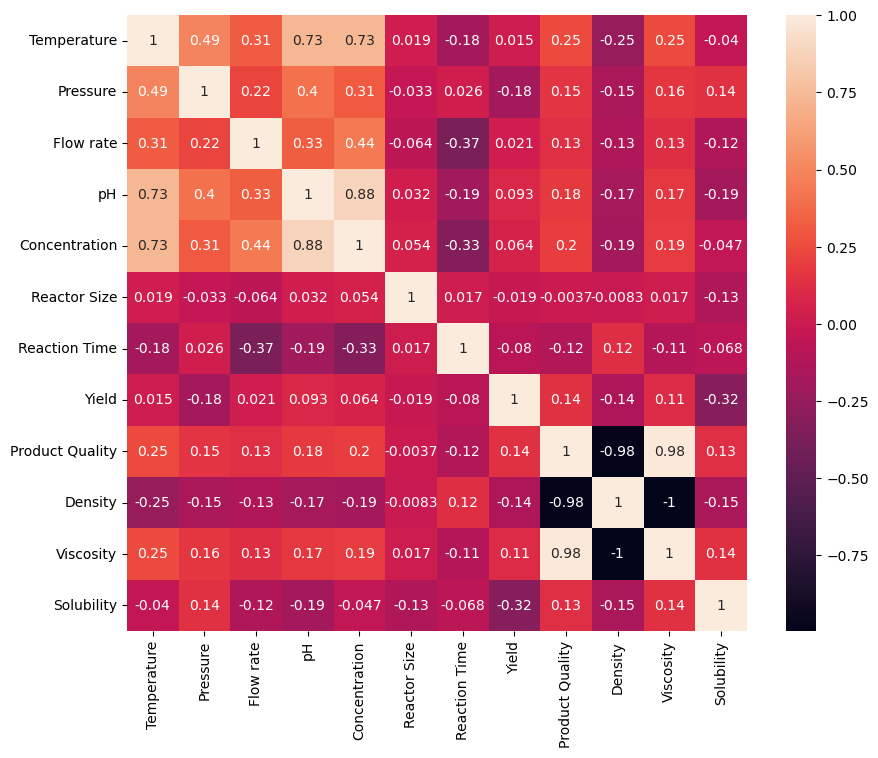

In [13]:
cor = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(cor,annot= True)

# Define features and target

In [76]:
X = df.drop(['Time Stamp','Catalyst Type','Yield'],axis=1)
y = df['Yield']
X

,Temperature,Pressure,Flow rate,pH,Concentration,Reactor Size,Reaction Time,Product Quality,Density,Viscosity,Solubility
0,65.48,14.25,6.81,7.58,0.37,20,17.12,98.50,0.89,12.50,80.0
1,64.20,13.72,6.22,7.28,0.41,25,15.57,98.70,0.86,13.45,85.6
2,63.15,13.11,5.96,7.81,0.38,30,19.84,98.10,0.91,11.83,77.4
3,61.72,12.87,5.40,7.13,0.34,35,20.55,98.40,0.84,14.07,81.5
4,62.97,13.31,6.43,7.09,0.36,40,17.76,97.80,0.87,12.94,79.8
...,...,...,...,...,...,...,...,...,...,...,...
145,61.65,13.35,6.14,7.55,0.36,35,18.75,12.87,81.10,0.88,79.8
146,60.08,13.04,5.90,7.15,0.34,40,18.49,12.97,80.60,0.87,80.4
147,62.04,13.57,6.24,7.71,0.38,20,18.58,12.90,80.90,0.88,81.0
148,61.40,13.26,6.08,7.43,0.36,25,18.70,13.39,81.20,0.87,79.9


## Split data into training and testing sets

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Regression Model Training

In [78]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [79]:
model.fit(X_train,y_train)

LinearRegression()

In [80]:
print("Intercept:",model.intercept_)
print("Coefficients:",model.coef_)

Intercept: 174.13326878417826
Coefficients: [ 0.00594509 -0.29906196 -0.27499105 -0.08696853  2.89456126 -0.01266063
 -0.07158594 -0.49291949 -0.63512578 -0.69498232 -0.35178514]


In [81]:
pd.DataFrame(model.coef_,X.columns,columns=['Coeff'])

,Coeff
Temperature,0.005945
Pressure,-0.299062
Flow rate,-0.274991
pH,-0.086969
Concentration,2.894561
Reactor Size,-0.012661
Reaction Time,-0.071586
Product Quality,-0.492919
Density,-0.635126
Viscosity,-0.694982


# Define hyperparameters for GridSearchCV

In [82]:
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False],
    'n_jobs': [1, 2, 3, 4]
}

## Define scoring metrics for GridSearchCV

In [83]:
scoring = ['neg_mean_squared_error', 'r2', 'neg_mean_absolute_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error']

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scoring, refit='neg_mean_squared_error',verbose=1)
grid_search.fit(X_test, y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False], 'n_jobs': [1, 2, 3, 4],
                         'positive': [True, False]},
             refit='neg_mean_squared_error',
             scoring=['neg_mean_squared_error', 'r2', 'neg_mean_absolute_error',
                      'neg_mean_squared_log_error',
                      'neg_median_absolute_error'],
             verbose=1)

In [86]:
best_model = grid_search.best_estimator_
print(f"Best Model: {grid_search.best_params_}")

Best Model: {'fit_intercept': True, 'n_jobs': 1, 'positive': True}


In [87]:
# Predict the values using the best model
y_pred = best_model.predict(X_test)

## Evaluating metrics

In [88]:
from sklearn.metrics import mean_squared_error, r2_score

In [89]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [90]:
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 0.5708759386666793
R2 Score: 0.018532646659895735


# Visualisation

## Scatter plot with regression line:

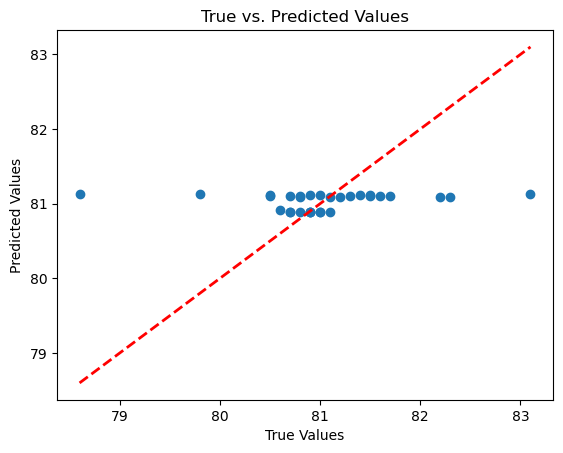

In [91]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.show()

## Residuals Plot

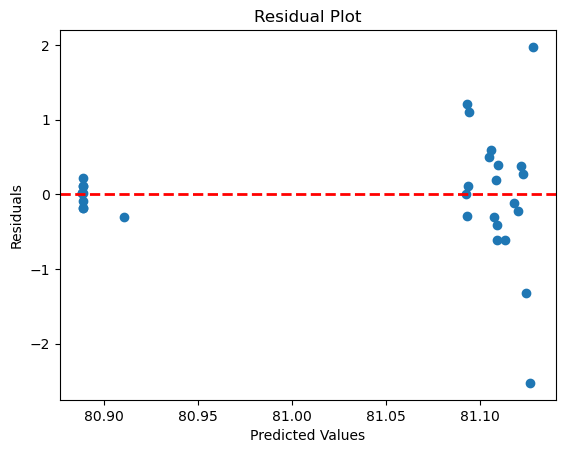

In [93]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## LASSO

In [96]:
lasso = Lasso(alpha=0.1)  # Set the regularization parameter alpha
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("Lasso Regression - Mean Squared Error:", mse_lasso)
print("Lasso Regression - R2_score:", r2_lasso)

Lasso Regression - Mean Squared Error: 0.6644836562942925
Lasso Regression - R2_score: -0.1424006010904948


C:\Users\TOUFIK\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.834e-02, tolerance: 1.184e-02
  model = cd_fast.enet_coordinate_descent(


## RIDGE

In [97]:
ridge = Ridge(alpha=0.1)  # Set the regularization parameter alpha
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge Regression - Mean Squared Error:", mse_ridge)
print("Ridge Regression - R2_score:", r2_ridge)

Ridge Regression - Mean Squared Error: 54.76824585125103
Ridge Regression - R2_score: -93.15924137256856
